In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from collections import defaultdict
import gzip

## Embeddings

In [69]:
# E = sp.load_npz('C:/Users/Vanda/PycharmProjects/all/results/nppmi/matrix/glove300d_l_0.5_DL_top400000.emb.gz_f_conceptnet56_top50000/conceptnet56_top50000_t40/nppmi_mtx.npz')
E = sp.load_npz('C:/Users/Vanda/PycharmProjects/all/data/sparse_matrices/word_base/embeddings/filtered/glove300d_l_0.5_DL_top400000.emb.gz_f_conceptnet56_top50000.npz')

In [44]:
E.shape

(49959, 1000)

In [45]:
V = np.var(E.todense(), axis=0)
V = np.squeeze(np.asarray(V))
nonzeros = E.getnnz(axis=0)

In [46]:
type(V)

numpy.ndarray

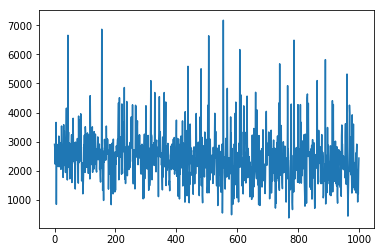

In [47]:
plt.plot(nonzeros)
plt.show()

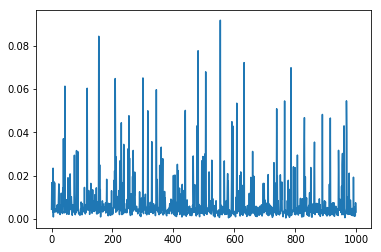

In [48]:
plt.plot(V)
plt.show()

In [49]:
variance_order = sorted(enumerate(V), key=lambda e: float(e[1]), reverse=True)

In [50]:
nnz_r = E.nonzero()[0]
nnz_c = E.nonzero()[1]

In [51]:
nnz_dict = defaultdict(set)
for i in range(nnz_c.shape[0]):
    col = nnz_c[i]
    row = nnz_r[i]
    nnz_dict[col].add(E[row, col])
len(nnz_dict)

1000

In [52]:
np.var(list(nnz_dict[0]))

0.03717563692428434

In [53]:
nnz_V = [0.0 for i in range(1000)]
for k, v in nnz_dict.items():
    vr = np.var(list(v))
    nnz_V[k] = vr
len(nnz_V)

1000

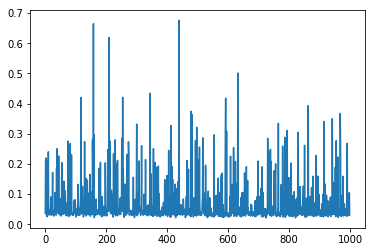

In [54]:
plt.plot(nnz_V)
plt.show()

In [55]:
nnz_variance_order = sorted(enumerate(nnz_V), key=lambda e: float(e[1]), reverse=True)

In [76]:
nnz_variance_order[0:10]

[(439, 0.6761964519464847),
 (158, 0.6645498255718686),
 (209, 0.6187167857494387),
 (632, 0.5012836905711193),
 (344, 0.4338469322059897),
 (254, 0.4206824109441376),
 (117, 0.42055436698961274),
 (592, 0.4180693848670768),
 (863, 0.39293744051896023),
 (478, 0.3749180422319633)]

In [78]:
nnz_variance_order[-5:]

[(460, 0.022223737692583973),
 (161, 0.021913071206754384),
 (428, 0.02157120975148771),
 (821, 0.02151595073117466),
 (725, 0.021058766513444443)]

In [79]:
variance_order[0:5]

[(554, 0.09174392433973118),
 (155, 0.0843375803920137),
 (481, 0.07764228327960812),
 (632, 0.07215969785577485),
 (786, 0.06979057955869636)]

In [74]:
variance_order[-5:]

[(725, 0.0006521099685898507),
 (551, 0.0006111540632106195),
 (963, 0.0005159659295938265),
 (581, 0.0004628438470164995),
 (769, 0.00040355366617888074)]

In [66]:
nonzeros[344]

4544

In [70]:
E.shape

(49959, 1000)

## Dictionary

In [144]:
path = 'C:/Users/Vanda/PycharmProjects/all/data/sparse_matrices/word_base/embeddings/glove300d_l_0.5_DL_top400000.dict.gz.npz'

In [145]:
D = sp.load_npz(path)

In [194]:
gz_path = 'C:/Users/Vanda/PycharmProjects/all/data/sparse_matrices/word_base/embeddings/dict_based/glove300d_l_0.5_DL_top400000.dict.gz'
f = gzip.open(gz_path, 'rb') 
M = []
for line_number, line in enumerate(f):
    parts = line.decode("utf-8").strip().split()
    M.append(parts)
M = np.asmatrix(M)
M = M.astype(np.float)

In [195]:
M.shape

(300, 1000)

In [197]:
V = M.var(axis=0)
V = np.squeeze(np.asarray(V))
variance_order = sorted(enumerate(V), key=lambda e: float(e[1]), reverse=True)

In [203]:
variance_order[-5:]

[(823, 0.003243025237883659),
 (333, 0.003235391407105377),
 (548, 0.003228322152355581),
 (727, 0.003227593131599157),
 (299, 0.0032095922026709324)]

In [204]:
np.var(V)

2.6718637113346165e-10

In [205]:
np.mean(V)

0.0033214402312204748

In [206]:
V.shape

(1000,)